In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Mall_Customers.csv')
df.shape

(200, 5)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values
print(x.shape)

(200, 2)


# Dendrogram

In [5]:
import scipy.cluster.hierarchy as sch

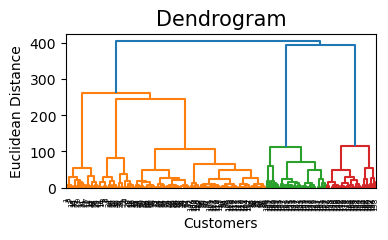

In [6]:
plt.rcParams['figure.figsize']=(4,2)
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram',fontsize=15)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

# Agglomerative Clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


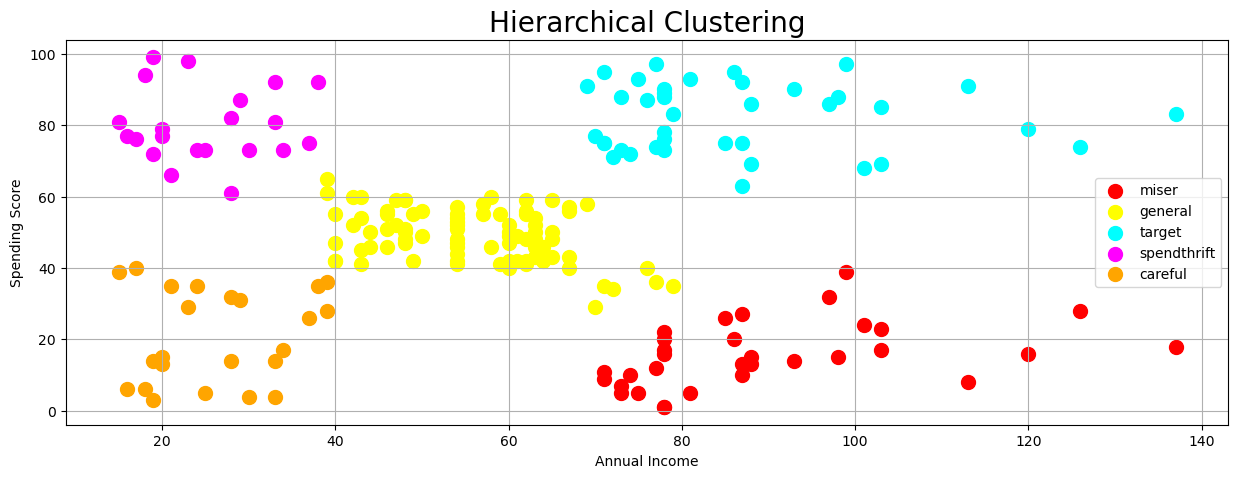

In [10]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')

plt.style.use('default')
plt.rcParams['figure.figsize']=(15,5)
plt.title('Hierarchical Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()